In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.8 MB/s eta 0:00:00


In [ ]:
#importing all the essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import re #for data pre-processing
import unicodedata #library for data pre-processing
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#mounting drive to collab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading file from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/training.1600000.processed.noemoticon.csv', encoding='ISO-8859-1')

In [ ]:
column_names = ['Sentiment', 'ids', 'date', 'flag', 'user', 'Reviews']

In [ ]:
df.columns = column_names

# Display the DataFrame
print(df.head())

   Sentiment         ids                          date      flag  \
0          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   

            user                                            Reviews  
0  scotthamilton  is upset that he can't update his Facebook by ...  
1       mattycus  @Kenichan I dived many times for the ball. Man...  
2        ElleCTF    my whole body feels itchy and like its on fire   
3         Karoli  @nationwideclass no, it's not behaving at all....  
4       joy_wolf                      @Kwesidei not the whole crew   


In [ ]:
df

,Sentiment,ids,date,flag,user,Reviews
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df.head()

,Sentiment,ids,date,flag,user,Reviews
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df = df.loc[df['Sentiment'].isin([0, 4])]

In [ ]:
df

,Sentiment,ids,date,flag,user,Reviews
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
# Geting unique values in the "Sentiment" column
unique_values = df['Sentiment'].unique()

print(unique_values)


[0 4]


In [ ]:
df['Sentiment'].replace(4, 1, inplace=True)

In [ ]:
# Geting unique values in the "Sentiment" column
unique_values = df['Sentiment'].unique()

print(unique_values)


[0 1]


In [ ]:
#checking for any null values
df['Sentiment'].isnull()

0          False
1          False
2          False
3          False
4          False
           ...  
1599994    False
1599995    False
1599996    False
1599997    False
1599998    False
Name: Sentiment, Length: 1599999, dtype: bool

In [ ]:
Sentiment_0 = df[df['Sentiment'] == 0]
Sentiment_1 = df[df['Sentiment'] == 1]

#Selecting Equal no of Positive and Negative Reviews
num_samples = 25000
sample_df = pd.concat([Sentiment_0.sample(n=num_samples, random_state=42),
                        Sentiment_1.sample(n=num_samples, random_state=42)])

# Shuffling the sampled DataFrame
df = sample_df.sample(frac=1, random_state=42)

df.head()

,Sentiment,ids,date,flag,user,Reviews
1464347,1,2064229792,Sun Jun 07 05:38:57 PDT 2009,NO_QUERY,PinoyTarsier,@indykitty *hug indykitty* sleep tight indy...
470773,0,2176489168,Mon Jun 15 04:00:43 PDT 2009,NO_QUERY,superbeccax,@corruptedlies omfggggggggggg i cant believe y...
503525,0,2187864875,Mon Jun 15 20:55:32 PDT 2009,NO_QUERY,jasmineyql,"@gillianlooey omg dear, meet me soon, i have s..."
374053,0,2051162486,Fri Jun 05 19:58:36 PDT 2009,NO_QUERY,kdheart,kaitlin. needs. twitter. rehab. KAITLIN. STOP....
831940,1,1557513350,Sun Apr 19 04:34:04 PDT 2009,NO_QUERY,eulaivi,is new on twitter


In [ ]:
df

,Sentiment,ids,date,flag,user,Reviews
1464347,1,2064229792,Sun Jun 07 05:38:57 PDT 2009,NO_QUERY,PinoyTarsier,@indykitty *hug indykitty* sleep tight indy...
470773,0,2176489168,Mon Jun 15 04:00:43 PDT 2009,NO_QUERY,superbeccax,@corruptedlies omfggggggggggg i cant believe y...
503525,0,2187864875,Mon Jun 15 20:55:32 PDT 2009,NO_QUERY,jasmineyql,"@gillianlooey omg dear, meet me soon, i have s..."
374053,0,2051162486,Fri Jun 05 19:58:36 PDT 2009,NO_QUERY,kdheart,kaitlin. needs. twitter. rehab. KAITLIN. STOP....
831940,1,1557513350,Sun Apr 19 04:34:04 PDT 2009,NO_QUERY,eulaivi,is new on twitter
...,...,...,...,...,...,...
750854,0,2285842353,Mon Jun 22 15:39:15 PDT 2009,NO_QUERY,Msdown4it,Abou to go et my rn on at Kenneth Hahn.. I so...
1407526,1,2055524987,Sat Jun 06 09:28:37 PDT 2009,NO_QUERY,QuirkyPianist,Making follow-up phone calls. Mildly terrified...
1473753,1,2065609454,Sun Jun 07 08:56:44 PDT 2009,NO_QUERY,lartist,@strangegods Have to say I love Friday's strip...
119197,0,1827994541,Sun May 17 11:52:28 PDT 2009,NO_QUERY,TheAmazingCat,"cant afford to see Angels and Demons, so i wa..."


In [ ]:
df['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

In [ ]:
#Assigning X & y with review and sentiment respectively

X = df['Reviews']
y = df['Sentiment']

In [ ]:
#splitting values in to train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.57, random_state=42)

In [ ]:
#chceking the length of the train, validation and test sets

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Training set size: 15000
Test set size: 19950
Validation set size: 15050


In [ ]:
#seeing the index locations for the variables

print(X_train.index)
print(X_test.index)
print(X_val.index)

Int64Index([1023750,  822201,  175113, 1393006,  337601,  764085, 1580749,
            1479749, 1393013, 1122245,
            ...
             478619, 1170325,  642562, 1521308,  869855,  998920, 1337053,
             515899,  513537,  855828],
           dtype='int64', length=15000)
Int64Index([ 893916, 1159275, 1054168,  982964,  876059,  263720,  877858,
             936908,  670195,  383927,
            ...
              56884,  927397, 1008968,  529244, 1023139, 1239436,  851724,
             678436,  681234,  299998],
           dtype='int64', length=19950)
Int64Index([  96353, 1097377,  141596,  351357,  901600,   74801, 1186990,
              16222,  753934,  559795,
            ...
             956264, 1539700,  363787, 1335516, 1531405,  317979,  845839,
             114045,  665912,  459533],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [ ]:
# Verifying the updated index values

print(X_train.index)
print(X_test.index)
print(X_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
#Printing the data brfore pre processing

print(X_train[0])
print(X_test[0])
print(X_val[0])

@joeguese Come back here in the Philippines!! 
shouldn't be getting any more location tweets from me..sorry turned that off...only web addresses will lead to blog or awesome websites 
last general studies exam today - what a load of crap 


In [ ]:
#seeing the index locations for the variables

print(y_train.index)
print(y_test.index)
print(y_val.index)

Int64Index([1023750,  822201,  175113, 1393006,  337601,  764085, 1580749,
            1479749, 1393013, 1122245,
            ...
             478619, 1170325,  642562, 1521308,  869855,  998920, 1337053,
             515899,  513537,  855828],
           dtype='int64', length=15000)
Int64Index([ 893916, 1159275, 1054168,  982964,  876059,  263720,  877858,
             936908,  670195,  383927,
            ...
              56884,  927397, 1008968,  529244, 1023139, 1239436,  851724,
             678436,  681234,  299998],
           dtype='int64', length=19950)
Int64Index([  96353, 1097377,  141596,  351357,  901600,   74801, 1186990,
              16222,  753934,  559795,
            ...
             956264, 1539700,  363787, 1335516, 1531405,  317979,  845839,
             114045,  665912,  459533],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [ ]:
print(y_train.index)
print(y_test.index)
print(y_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
print(y_train[0])
print(y_test[0])
print(y_val[0])

1
1
0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove punctuation and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back to a cleaned text
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Preprocessing the data

X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test_preprocessed = [preprocess_text(text) for text in X_test]

X_val_preprocessed = [preprocess_text(text) for text in X_val]


In [ ]:
#Printing pre processed data

print(X_train_preprocessed[0])
print(X_test_preprocessed[0])
print(X_val_preprocessed[0])

joeguese come back philippine
getting location tweet sorry turned web address lead blog awesome website
last general study exam today load crap


Tokenizing and creating datasets for train, validation and test sets so they can be used through out different types of training sessions and evaluation of diferent models

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenizing and encoding the train data
X_train_encoded = tokenizer.batch_encode_plus(
    X_train_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
# Tokenizing and encoding the validation data
X_val_encoded = tokenizer.batch_encode_plus(
    X_val_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors from the encoded data
input_ids_train = X_train_encoded['input_ids']
attention_masks_train = X_train_encoded['attention_mask']
labels_train = torch.tensor(y_train.values)

input_ids_val = X_val_encoded['input_ids']
attention_masks_val = X_val_encoded['attention_mask']
labels_val = torch.tensor(y_val.values)

# Creating datasets
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# Tokenizing and encoding the test data
X_test_encoded = tokenizer.batch_encode_plus(
    X_test_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors and attention masks from the encoded data
input_ids_test = X_test_encoded['input_ids']
attention_masks_test = X_test_encoded['attention_mask']
labels_test = torch.tensor(y_test.values)

# Creating datasets
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:
# Setting the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Adam Optimizer

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAOTwitter.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.6030374485015869, Validation Accuracy: 0.7485714285714286
Epoch 2/5, Loss: 0.48400100188255313, Validation Accuracy: 0.761328903654485
Epoch 3/5, Loss: 0.4274295849005381, Validation Accuracy: 0.7651827242524917
Epoch 4/5, Loss: 0.35368548420270285, Validation Accuracy: 0.7636544850498339
Epoch 5/5, Loss: 0.2805679745833079, Validation Accuracy: 0.7564119601328904


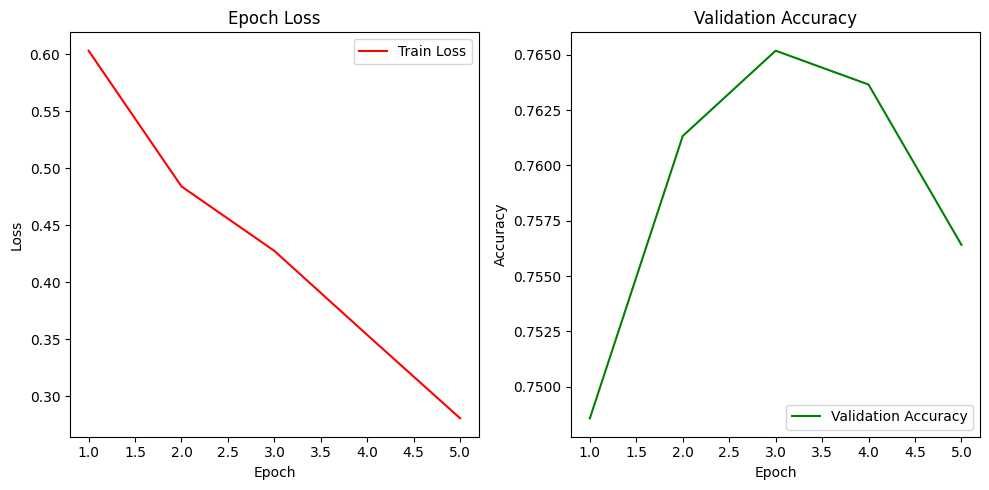

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBAOTwitter_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAOTwitter.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 75.63%
Classification Report:
               precision    recall  f1-score   support

    negative       0.79      0.70      0.74     10012
    positive       0.73      0.81      0.77      9938

    accuracy                           0.76     19950
   macro avg       0.76      0.76      0.76     19950
weighted avg       0.76      0.76      0.76     19950

Confusion Matrix:
 [[7018 2994]
 [1868 8070]]


# 2 Adam Optimizer with Cosine Anneaing LR Scheduler




In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=5, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAO1Twitter.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.5962035876274109, Validation Accuracy: 0.7542857142857143
Epoch 2/5, Loss: 0.47105917387008667, Validation Accuracy: 0.7601993355481728
Epoch 3/5, Loss: 0.41195797634124753, Validation Accuracy: 0.761063122923588
Epoch 4/5, Loss: 0.36006748032569885, Validation Accuracy: 0.7627242524916944
Epoch 5/5, Loss: 0.32562362847328186, Validation Accuracy: 0.7606644518272425


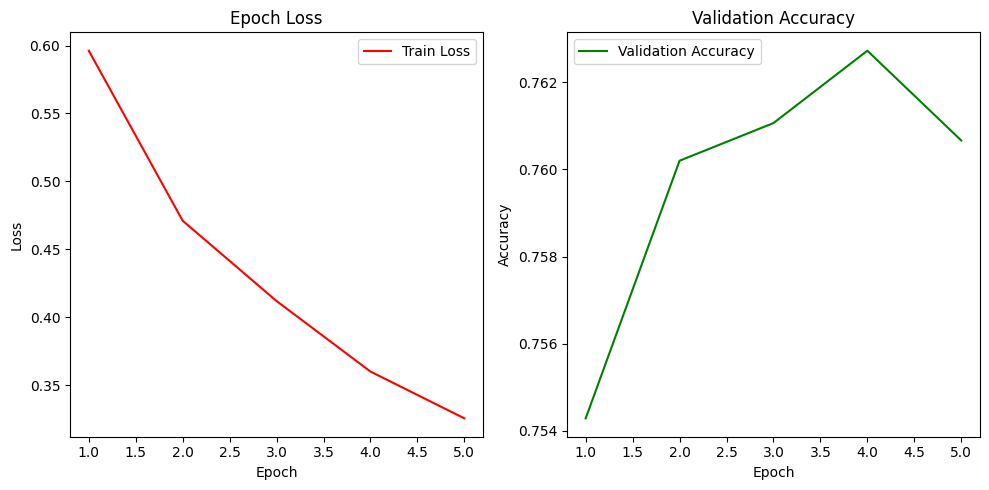

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBAO1Twitter_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAO1Twitter.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 76.31%
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.79      0.77     10012
    positive       0.78      0.74      0.76      9938

    accuracy                           0.76     19950
   macro avg       0.76      0.76      0.76     19950
weighted avg       0.76      0.76      0.76     19950

Confusion Matrix:
 [[7886 2126]
 [2600 7338]]


# 3 Lamb Optimizer with Exponential LR Scheduler




In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
from torch_optimizer import Lamb
from torch.optim.lr_scheduler import ExponentialLR

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = Lamb(model.parameters(), lr= 2e-5)
scheduler = ExponentialLR(optimizer, gamma=0.95)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBLOTwitter.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.6900169118245443, Validation Accuracy: 0.5897009966777409
Epoch 2/5, Loss: 0.6805644259770711, Validation Accuracy: 0.6178073089700997
Epoch 3/5, Loss: 0.6676776474316914, Validation Accuracy: 0.6357475083056479
Epoch 4/5, Loss: 0.6567061383565267, Validation Accuracy: 0.6546179401993355
Epoch 5/5, Loss: 0.6452428160349528, Validation Accuracy: 0.66


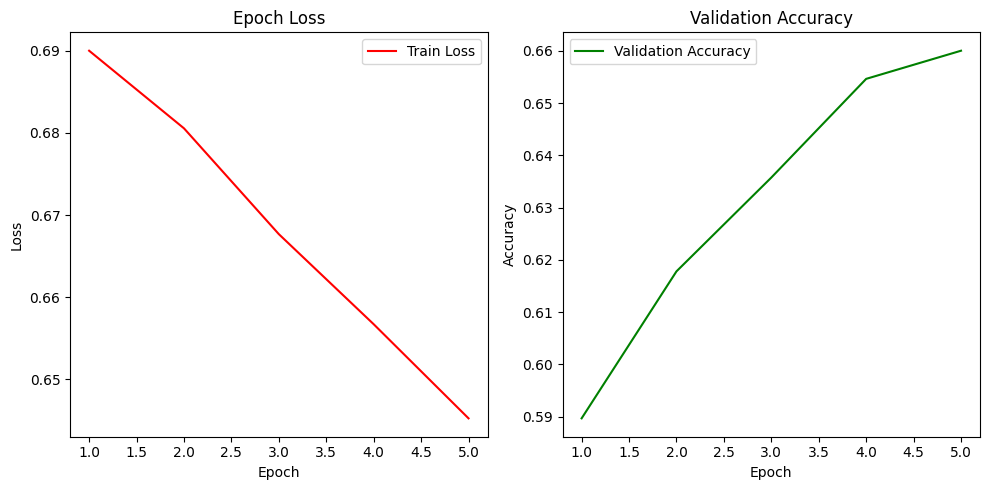

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBLOTwitter_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBLOTwitter.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 65.93%
Classification Report:
               precision    recall  f1-score   support

    negative       0.70      0.56      0.62     10012
    positive       0.63      0.76      0.69      9938

    accuracy                           0.66     19950
   macro avg       0.67      0.66      0.66     19950
weighted avg       0.67      0.66      0.66     19950

Confusion Matrix:
 [[5558 4454]
 [2343 7595]]


# 4 Adagrad Optimizer with Linear Warmup LR Scheduler




In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

batch_size = 256
num_cpu = 12

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# declaring Hyperparameters

early_stopping_patience = 3
epochs_without_improvement = 0
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optimizer = optim.Adagrad(model.parameters(), lr=2e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step(epoch_loss)


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAGTwitter.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.6546116092046101, Validation Accuracy: 0.6917607973421926
Epoch 2/5, Loss: 0.5831877748171489, Validation Accuracy: 0.7218604651162791
Epoch 3/5, Loss: 0.5488874162197113, Validation Accuracy: 0.7358139534883721
Epoch 4/5, Loss: 0.5312814619064331, Validation Accuracy: 0.7417275747508305
Epoch 5/5, Loss: 0.5216022603670756, Validation Accuracy: 0.7455149501661129


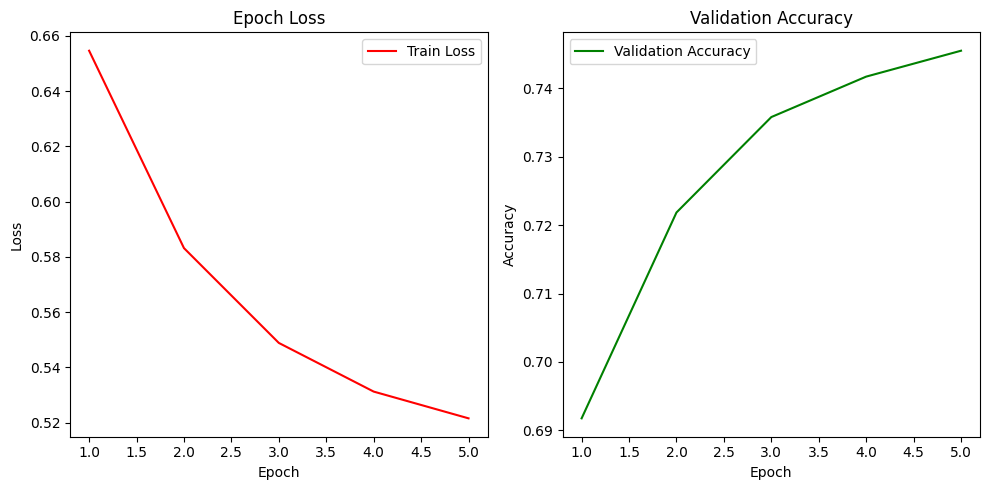

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBAGTwitter_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAGTwitter.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 74.26%
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.69      0.73     10012
    positive       0.72      0.79      0.75      9938

    accuracy                           0.74     19950
   macro avg       0.74      0.74      0.74     19950
weighted avg       0.75      0.74      0.74     19950

Confusion Matrix:
 [[6950 3062]
 [2074 7864]]


# 5 AdamW Optimizer with Cyclic LR Scheduler




In [ ]:
from transformers import get_linear_schedule_with_warmup

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

batch_size = 256
num_cpu = 12

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# declaring Hyperparameters

early_stopping_patience = 3
epochs_without_improvement = 0
num_epochs = 5
steps_per_epoch = len(train_dataloader)
total_steps = num_epochs * steps_per_epoch
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.AdamW(model.parameters(), lr=2e-5, eps=1e-08)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0.1 * total_steps, num_training_steps=total_steps)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAWTwitter.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.703438465499878, Validation Accuracy: 0.44843853820598006
Epoch 2/5, Loss: 0.6991924034754435, Validation Accuracy: 0.5235215946843854
Epoch 3/5, Loss: 0.6868257678667704, Validation Accuracy: 0.6047840531561461
Epoch 4/5, Loss: 0.6413809386571249, Validation Accuracy: 0.6970764119601329
Epoch 5/5, Loss: 0.5564961414019267, Validation Accuracy: 0.7398671096345515


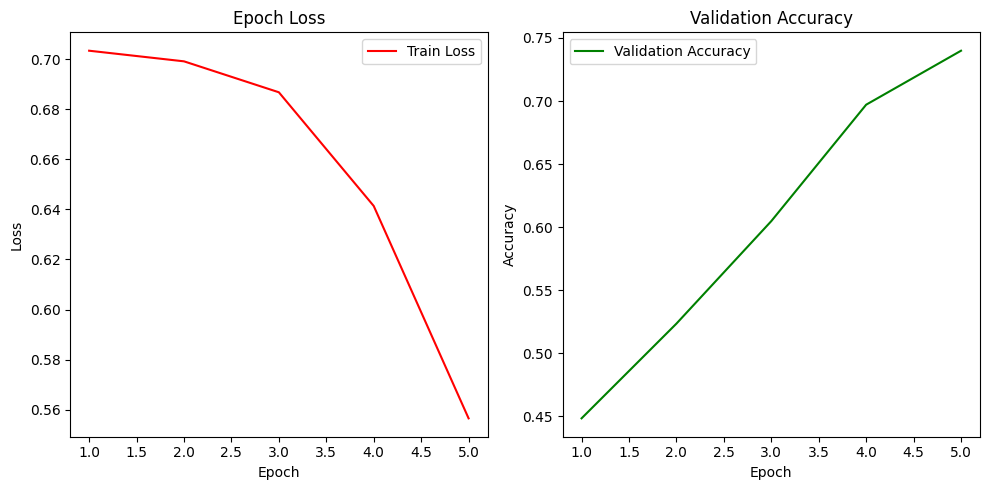

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/BBAWTwitter_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/BBAWTwitter.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 73.94%
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.74      0.74     10012
    positive       0.74      0.74      0.74      9938

    accuracy                           0.74     19950
   macro avg       0.74      0.74      0.74     19950
weighted avg       0.74      0.74      0.74     19950

Confusion Matrix:
 [[7394 2618]
 [2580 7358]]


In [ ]:
user_input = input("Enter a sentence: ")
preprocessed_input = preprocess_text(user_input)
encoded_input= tokenizer.batch_encode_plus(
    [preprocessed_input],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
input_ids = encoded_input['input_ids'].to(device)
attention_masks_test = encoded_input['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks_test)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

class_names = ["negative", "positive"]
predicted_sentiment = class_names[predicted_label]
print("Predicted sentiment:", predicted_sentiment)

Enter a sentence: good
Predicted sentiment: positive
